In [2]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd

In [12]:
housevalue = fch()
x = pd.DataFrame(housevalue.data)
x.columns = housevalue.feature_names
y = housevalue.target

In [13]:
xtrain, xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=666)
for i in [xtrain, xtest]:
    i.index = range(i.shape[0])

In [14]:
reg = LR().fit(xtrain,ytrain)
yhat = reg.predict(xtest)
yhat

array([1.94861414, 1.28751704, 0.72952491, ..., 4.13182042, 2.43947997,
       1.36345318])

In [15]:
[*zip(xtrain.columns,reg.coef_)]

[('MedInc', 0.440228234473077),
 ('HouseAge', 0.009483915211687993),
 ('AveRooms', -0.11284334216964098),
 ('AveBedrms', 0.6097127147709994),
 ('Population', -4.004826640747858e-06),
 ('AveOccup', -0.003969627317461856),
 ('Latitude', -0.4124682789498434),
 ('Longitude', -0.4265522739083784)]

In [17]:
reg.intercept_

-36.25068267909076

In [18]:
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat,ytest)

0.5208993613292042

In [19]:
cross_val_score(reg,x,y,cv=10,scoring="neg_mean_squared_error")

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [20]:
from sklearn.metrics import r2_score
r2_score(yhat,ytest)

0.33549508431167707

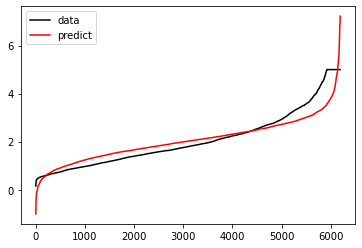

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(len(ytest)),sorted(ytest),c="black",label="data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label="predict")
plt.legend()
plt.show()